In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
all_drugs = pd.read_csv('./data/all_drugs.csv')
all_drugs.head()

C:\Users\12155\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,key_0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,...,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name,dosage_form,route
0,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,204320,2,NaN,"May 30, 2017",No,No,DISCN,AJANTA PHARMA LTD,"TABLET, ORALLY DISINTEGRATING",ORAL
1,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,91265,2,AB,"Oct 24, 2011",No,No,RX,APOTEX INC,"TABLET, ORALLY DISINTEGRATING",ORAL
2,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,203708,2,AB,"May 15, 2014",No,No,RX,AUROBINDO PHARMA LTD,"TABLET, ORALLY DISINTEGRATING",ORAL
3,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,77243,2,AB,"Jan 30, 2012",No,No,RX,BARR LABORATORIES INC,"TABLET, ORALLY DISINTEGRATING",ORAL
4,OLANZAPINE 10MG ORAL,OLANZAPINE 10MG TABLET,904637661,0.2202,12/23/2015,EA,C/I,N,1,G,...,76534,2,AB,"Oct 24, 2011",No,No,RX,DR REDDYS LABORATORIES LTD,"TABLET, ORALLY DISINTEGRATING",ORAL


In [3]:
top_drugs = all_drugs['NDC Description'].value_counts().sort_values(ascending = False)
top_generics = top_drugs.index.unique()
top_generics
top_10 = top_generics[:10]
top_10

Index(['IBUPROFEN 200MG TABLET', 'LEVETIRACETAM 500MG TABLET',
       'LEVETIRACETAM 750MG TABLET', 'HYDROCHLOROTHIAZIDE 50MG TABLET ORAL',
       'LOSARTAN POTASSIUM 50MG TABLET ORAL',
       'LOSARTAN POTASSIUM 100MG TABLET ORAL', 'LAMOTRIGINE 25MG TABLET',
       'HYDROCHLOROTHIAZIDE 25MG TABLET ORAL', 'METRONIDAZOLE 500MG TABLET',
       'LISINOPRIL 20MG TABLET'],
      dtype='object')

In [4]:
top_10_generics = pd.DataFrame()
for i in top_10:
    i_df = all_drugs[all_drugs['NDC Description'] == i]
    top_10_generics = top_10_generics.append(i_df, ignore_index = True)
top_10_generics.head(3)

,key_0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,...,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name,dosage_form,route
0,IBUPROFEN 200MG ORAL,IBUPROFEN 200MG TABLET,37205035071,0.02881,12/17/2014,EA,C/I,Y,1,G,...,74782,1,NaN,"Jul 6, 1998",No,No,DISCN,CONTRACT PHARMACAL CORP,CAPSULE,ORAL
1,IBUPROFEN 200MG ORAL,IBUPROFEN 200MG TABLET,37205035071,0.02881,12/17/2014,EA,C/I,Y,1,G,...,79233,1,NaN,"Mar 18, 2014",No,No,OTC,AMNEAL PHARMACEUTICALS OF NEW YORK LLC,TABLET,ORAL
2,IBUPROFEN 200MG ORAL,IBUPROFEN 200MG TABLET,37205035071,0.02881,12/17/2014,EA,C/I,Y,1,G,...,71333,1,NaN,"Feb 17, 1987",No,No,OTC,AMNEAL PHARMACEUTICALS NY LLC,TABLET,ORAL


In [5]:
brands = all_drugs[(all_drugs['Classification_for_Rate_Setting'] == 'B')|(all_drugs['Classification_for_Rate_Setting'] == 'B_ANDA')]
top_brands = brands['NDC Description'].value_counts().sort_values(ascending = False)
top_brands = top_brands.index.unique()
top_10_brands = top_brands[:10]
top_10_brands

Index(['CHILDREN'S ADVIL 100MG/5ML', 'DALIRESP 500MCG TABLET',
       'ENTRESTO 97MG-103MG TABLET', 'ENTRESTO 49MG-51MG TABLET',
       'CARDIZEM LA 180MG TABLET', 'LOTEMAX 0.5% OPHTHALMIC GEL',
       'ENTRESTO 24MG-26MG TABLET', 'GLUCOTROL XL 5MG TABLET',
       'CARDIZEM LA 120MG TABLET', 'GLUCOTROL XL 10MG TABLET'],
      dtype='object')

In [6]:
top_10_brands_df = pd.DataFrame()
for i in top_10_brands:
    i_df = all_drugs[all_drugs['NDC Description'] == i]
    top_10_brands_df = top_10_brands_df.append(i_df, ignore_index = True)
top_10_brands_df.head(3)

,key_0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,...,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name,dosage_form,route
0,CHILDREN'S ADVIL 100MG/5ML ORAL,CHILDREN'S ADVIL 100MG/5ML,573029030,0.03677,08/19/2015,ML,C/I,Y,"2, 5",B,...,19833,2,NaN,"Sep 19, 1989",No,No,DISCN,GLAXOSMITHKLINE CONSUMER HEALTHCARE HOLDINGS U...,SUSPENSION,ORAL
1,CHILDREN'S ADVIL 100MG/5ML ORAL,CHILDREN'S ADVIL 100MG/5ML,573029030,0.03677,08/19/2015,ML,C/I,Y,"2, 5",B,...,20589,1,NaN,"Jun 27, 1996",No,No,OTC,GLAXOSMITHKLINE CONSUMER HEALTHCARE HOLDINGS U...,SUSPENSION,ORAL
2,CHILDREN'S ADVIL 100MG/5ML ORAL,CHILDREN'S ADVIL 100MG/5ML,573017130,0.03621,07/23/2014,ML,C/I,Y,"2, 5",B,...,19833,2,NaN,"Sep 19, 1989",No,No,DISCN,GLAXOSMITHKLINE CONSUMER HEALTHCARE HOLDINGS U...,SUSPENSION,ORAL


In [7]:
top_10_brands_df['Effective_Date'] = pd.to_datetime(top_10_brands_df['Effective_Date'])

In [8]:
top_10_generics['Effective_Date'] = pd.to_datetime(top_10_generics['Effective_Date'])

In [9]:
top_10_brands_df.dtypes

key_0                                                object
NDC Description                                      object
NDC                                                   int64
NADAC_Per_Unit                                      float64
Effective_Date                               datetime64[ns]
Pricing_Unit                                         object
Pharmacy_Type_Indicator                              object
OTC                                                  object
Explanation_Code                                     object
Classification_for_Rate_Setting                      object
Corresponding_Generic_Drug_NADAC_Per_Unit           float64
Corresponding_Generic_Drug_Effective_Date            object
As of Date                                           object
Unnamed: 0                                            int64
Ingredient                                           object
DF;Route                                             object
Trade_Name                              

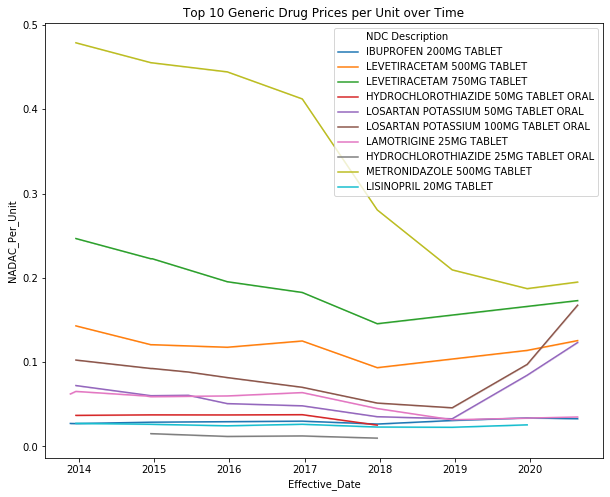

In [10]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.lineplot(x='Effective_Date', y='NADAC_Per_Unit', hue = 'NDC Description', data = top_10_generics)
plt.title('Top 10 Generic Drug Prices per Unit over Time')
plt.savefig('./images/top_20_generic_timeseries.jpg');
#looking into metronidazole 500mg tablet and losartan potassium 100mg tablet

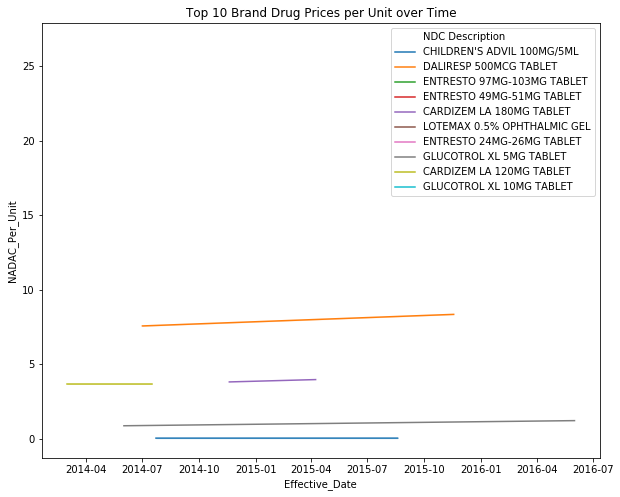

In [11]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Effective_Date', y='NADAC_Per_Unit', hue = 'NDC Description', data = top_10_brands_df)
plt.title('Top 10 Brand Drug Prices per Unit over Time')
plt.savefig('./images/top_10_brand_timeseries.jpg');
#these all look pretty stable


In [12]:
metron = all_drugs[all_drugs['NDC Description'] == 'METRONIDAZOLE 500MG TABLET']
metron.head(2)

,key_0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,...,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name,dosage_form,route
37805,METRONIDAZOLE 500MG ORAL,METRONIDAZOLE 500MG TABLET,68084096611,0.44439,12/23/2015,EA,C/I,N,1,G,...,76519,2,NaN,"Jun 27, 2003",No,No,DISCN,ABLE LABORATORIES INC,TABLET,ORAL
37806,METRONIDAZOLE 500MG ORAL,METRONIDAZOLE 500MG TABLET,68084096611,0.44439,12/23/2015,EA,C/I,N,1,G,...,79067,2,AB,"Mar 13, 2009",No,No,RX,ALEMBIC PHARMACEUTICALS LTD,TABLET,ORAL


In [13]:
losartan = all_drugs[all_drugs['NDC Description'] == 'LOSARTAN POTASSIUM 100MG TABLET ORAL']
losartan.head(2)

,key_0,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,...,Appl_No,Product_No,TE_Code,Approval_Date,RLD,RS,Type,Applicant_Full_Name,dosage_form,route
46387,LOSARTAN POTASSIUM 100MG ORAL,LOSARTAN POTASSIUM 100MG TABLET ORAL,43547036209,0.08175,12/23/2015,EA,C/I,N,1,G,...,90428,3,AB,"Oct 6, 2010",No,No,RX,ALEMBIC PHARMACEUTICALS LTD,TABLET,ORAL
46388,LOSARTAN POTASSIUM 100MG ORAL,LOSARTAN POTASSIUM 100MG TABLET ORAL,43547036209,0.08175,12/23/2015,EA,C/I,N,1,G,...,90790,3,NaN,"Oct 6, 2010",No,No,DISCN,APOTEX CORP,TABLET,ORAL


In [14]:
metron.set_index(pd.to_datetime(metron['Effective_Date']), inplace=True)
metron_arima = pd.DataFrame(metron['NADAC_Per_Unit'].groupby(metron.index).mean())
losartan.set_index(pd.to_datetime(losartan['Effective_Date']), inplace=True)
losartan_arima = pd.DataFrame(losartan['NADAC_Per_Unit'].groupby(losartan.index).mean())

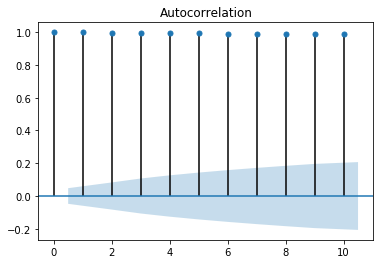

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(metron['NADAC_Per_Unit'], lags = 10);
#no seasonality, but there seems to be a trend

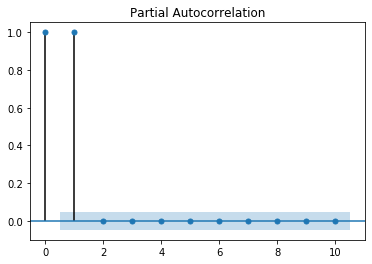

In [16]:
plot_pacf(metron['NADAC_Per_Unit'], lags = 10);

In [17]:
#metron.drop(columns=['Corresponding_Generic_Drug_Effective_Date', 'Unnamed: 0', 'DF;Route'], inplace=True)
features =  metron[['NDC Description','Pharmacy_Type_Indicator', 'Classification_for_Rate_Setting', 'dosage_form', 'route',
           'Ingredient', 'Type']].copy()
feature_dummies = pd.get_dummies(features, columns = ['NDC Description','Pharmacy_Type_Indicator', 'Classification_for_Rate_Setting', 'dosage_form', 'route',
           'Ingredient', 'Type'], drop_first=True)
X = feature_dummies
y = metron['NADAC_Per_Unit']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3, 
                                                    shuffle=False)

In [19]:
a_X = metron_arima.index
a_y = metron_arima['NADAC_Per_Unit']
a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(X,y,
                                                    test_size = 0.3, 
                                                    shuffle=False)

In [20]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [21]:
X_train

,const,Type_RX
Effective_Date,,
2015-12-23,1.0,0
2015-12-23,1.0,1
2015-12-23,1.0,1
2015-12-23,1.0,1
2015-12-23,1.0,1
...,...,...
2017-12-20,1.0,0
2017-12-20,1.0,1
2017-12-20,1.0,0


In [22]:
lm = sm.OLS(y_train, X_train)
lm_results = lm.fit()
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:         NADAC_Per_Unit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 3.755e-13
Date:                Sun, 11 Oct 2020   Prob (F-statistic):               1.00
Time:                        15:52:16   Log-Likelihood:                 1480.3
No. Observations:                1176   AIC:                            -2957.
Df Residuals:                    1174   BIC:                            -2947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4129      0.003    132.907      0.0

In [23]:
lm_results.predict(X_test)

Effective_Date
2018-12-19    0.412944
2018-12-19    0.412944
2018-12-19    0.412944
2018-12-19    0.412944
2018-12-19    0.412944
                ...   
2020-08-19    0.412944
2020-08-19    0.412944
2020-08-19    0.412944
2020-08-19    0.412944
2020-08-19    0.412944
Length: 504, dtype: float64

In [24]:
r2_score(y_test, lm_results.predict(X_test))

-522.080807197126

In [25]:
mean_squared_error(y_test, lm_results.predict(X_test), squared=False)

0.2162415607460271

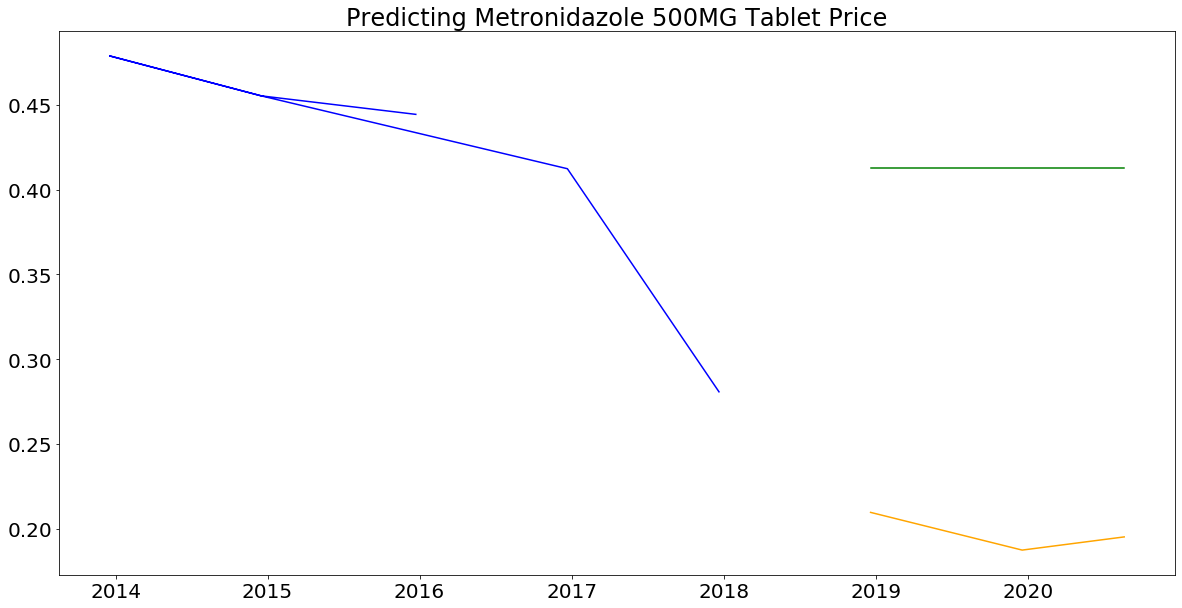

In [33]:
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'orange')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'green')

# Set label.
plt.title(label = 'Predicting Metronidazole 500MG Tablet Price', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('./images/predicting_price.jpg');

In [27]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(metron['NADAC_Per_Unit']))
#the p value is 0.9 > 0.01 so we cannot accept that our data is stationary

Test Statistic   -0.342415
p-value           0.919279
dtype: float64

In [28]:
from warnings import filterwarnings
#following manual grid search from lesson 9.03
filterwarnings('ignore')
best_aic = 99 * (10 ** 20)
best_p = 0
best_q = 0 

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting to fit ARIMA({p}, 1, {q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog=a_y_train.astype(float).dropna(),
                         order = (p, 1, q))
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0, 1, 0)
The AIC for ARIMA(0,1,0) is: -9479.239499822641
Attempting to fit ARIMA(0, 1, 1)
The AIC for ARIMA(0,1,1) is: -9477.24082687452
Attempting to fit ARIMA(0, 1, 2)
The AIC for ARIMA(0,1,2) is: -9475.24216074849
Attempting to fit ARIMA(0, 1, 3)
The AIC for ARIMA(0,1,3) is: -9473.243501512574
Attempting to fit ARIMA(0, 1, 4)
The AIC for ARIMA(0,1,4) is: -9471.244849235729
Attempting to fit ARIMA(1, 1, 0)
The AIC for ARIMA(1,1,0) is: -9477.240824046006
Attempting to fit ARIMA(1, 1, 1)
Attempting to fit ARIMA(1, 1, 2)
Attempting to fit ARIMA(1, 1, 3)
Attempting to fit ARIMA(1, 1, 4)
Attempting to fit ARIMA(2, 1, 0)
The AIC for ARIMA(2,1,0) is: -9475.242152209994
Attempting to fit ARIMA(2, 1, 1)
Attempting to fit ARIMA(2, 1, 2)
Attempting to fit ARIMA(2, 1, 3)
Attempting to fit ARIMA(2, 1, 4)
Attempting to fit ARIMA(3, 1, 0)
The AIC for ARIMA(3,1,0) is: -9473.243484378934
Attempting to fit ARIMA(3, 1, 1)
The AIC for ARIMA(3,1,1) is: -9471.24348577168
Attempting

In [29]:
a_y_test.index[1]

Timestamp('2018-12-19 00:00:00')

In [30]:
a_y_test.index[-1]

Timestamp('2020-08-19 00:00:00')

In [31]:
a_y_test.shape

(504,)

In [32]:
model = ARIMA(endog=a_y_train.astype(float).dropna(),
             order = (0,1,0))

arima = model.fit()

preds = model.predict(params=arima.params,
                     start = a_y_test.index[0],
                     end = a_y_test.index[-1])
#This keep bringing this error, I tried a lot of different things to fix it and none of them worked to index my y_test

# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(a_y_train.index, pd.DataFrame(a_y_train).diff(), color = 'blue')

# Plot testing data.
plt.plot(a_y_test.index, pd.DataFrame(a_y_test).diff(), color = 'orange')

# Plot predicted test values.
plt.plot(a_y_test.index, preds, color = 'green')

plt.title(label = 'Metronidazole 500 MG Tablet Price with ARIMA Model', fontsize=16)
plt.show();

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

In [ ]:
plot_acf(losartan['NADAC_Per_Unit'], lags = 20);

In [ ]:
plot_pacf(losartan['NADAC_Per_Unit'], lags = 20);

In [ ]:
#losartan.drop(columns=['Corresponding_Generic_Drug_Effective_Date', 'Unnamed: 0', 'DF;Route'], inplace=True)
features_lo =  losartan[['NDC Description','Pharmacy_Type_Indicator', 'Classification_for_Rate_Setting', 'dosage_form', 'route',
           'Ingredient', 'Type']].copy()
feature_dummies_lo = pd.get_dummies(features_lo, columns = ['NDC Description','Pharmacy_Type_Indicator', 'Classification_for_Rate_Setting', 'dosage_form', 'route',
           'Ingredient', 'Type'], drop_first=True)
X = feature_dummies_lo
y = losartan['NADAC_Per_Unit']
#seeing how well we can predict off of current data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2, shuffle=False)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
lm = sm.OLS(y_train, X_train)
lm_results = lm.fit()
print(lm_results.summary())

In [ ]:
r2_score(y_test, lm_results.predict(X_test))

In [ ]:
mean_squared_error(y_test, lm_results.predict(X_test), squared=False)

In [ ]:
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(y_train.index, y_train.values, color = 'blue')

# Plot testing data.
plt.plot(y_test.index, y_test.values, color = 'orange')

# Plot predicted test values.
plt.plot(lm_results.predict(X_test), color = 'green')

# Set label.
plt.title(label = 'Predicting Metronidazole 500MG Tablet Price', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [ ]:
#This is something I plan to re-visit now that I will have free time 